# 作業4~6 文字資料處理 周杰倫歌詞分析

由於作業四到六要自然語言處理（ＮＬＰ），於是去datacamp 把兩個關於NLP的課程打完，但由於上面教的套件，像是ntlk或是spacy，主要都是針對英文所做的處理，因此在處理中文方面，我挑了網路有比較多介紹教學文的歌詞處理來做。
資料為我自己上網查詢複製並放進text文字檔的周杰倫歌詞


### 作業目標為：希望透過文字處理 找出熱門周杰倫歌詞中最重要的詞彙以及建立模型做出潛在主題分析


In [174]:
#載入需要的套件
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
# import jieba 並使用繁中字典
import jieba
import jieba.analyse
jieba.set_dictionary("jieba_dict.txt")
import codecs
#文字雲
from wordcloud import WordCloud

In [176]:
#在資料夾裡面放入微軟正黑體 讓視覺化結果可以顯示中文
import matplotlib.font_manager as mfm
font_path = "./simhei.ttf"
prop = mfm.FontProperties(fname = font_path)

In [177]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import os
from gensim import corpora, models, similarities

將我整理好的文字擋讀入，並以 jieba.analyse.extract_tags 取出歌曲的 10 大關鍵字
計算原理為 tf-idf 算法。

In [178]:
with open("jay.txt", "r") as f1:
    for line in f1:
        words = jieba.analyse.extract_tags(line,10)
        print(",".join(words))
f1.close()

Building prefix dict from /Users/terrylu/Desktop/資料科學程式設計/hw4~6/jieba_dict.txt ...
2019-05-08 10:31:26,859 : DEBUG : Building prefix dict from /Users/terrylu/Desktop/資料科學程式設計/hw4~6/jieba_dict.txt ...
Loading model from cache /var/folders/k6/yqr2761j2txc3xkqnb9d5sxw0000gn/T/jieba.u223694add791f415c464d561f9148a85.cache
2019-05-08 10:31:26,862 : DEBUG : Loading model from cache /var/folders/k6/yqr2761j2txc3xkqnb9d5sxw0000gn/T/jieba.u223694add791f415c464d561f9148a85.cache
Loading model cost 0.730 seconds.
2019-05-08 10:31:27,591 : DEBUG : Loading model cost 0.730 seconds.
Prefix dict has been built succesfully.
2019-05-08 10:31:27,592 : DEBUG : Prefix dict has been built succesfully.


離開,杯墊,情緒,後面,從前,依舊,可見,回憶,畫面,鞦韆
漸漸,我們,放下,開始,改變,錯過,時間,再見,身邊,或許

明明,比較,溫柔,也許,能給,抉擇,自動,罐裡,顏色,快樂

不知不覺,後知後覺,離開,愛情,龍捲風,節奏,太快,不能,已經,不要

我們,乘著,陽光,衝浪,一點,型男,看著,遠方,別當,靠在

男人,什麼,算什麼,難過,起霧,眼睜睜,不聞不問,就別,硬撐,拱手讓人

記得,手寫,和弦,輕刷,陽光,情人節,永遠,廣場,公園,校園

時差,沒有,愛你,一點,圓周,旋轉,意義,這天,安靜,遠行

怎麼,其實,場景,什麼,有什麼,嘴硬,從未,愛過,發什麼,神經

紅塵,誰領,風騷,只為,折腰,出鞘,恩怨,只求,武林,懷抱

睡著,繼續,螢火蟲,帶著,鄉間,歌謠,永遠,快樂,這麼,沒有

發現,再見,見不到,這樣,過去,天涼,雨下,我愛的,遺失,落葉

怎麼,開心,幸福,愛淡,夢遠,記得,我錯,淚乾,後悔,回憶

離開,季節,細數,慚愧,我傷,幾回,後視鏡,裡的,越來越,道別

長大,約定,那樣,一起,還是,我們,哪裡,打過,堅持,任性

煙雨,青色,瓶底,炊煙,裊裊,隔江,萬里,書漢隸仿,飄逸,就當

親愛的,擁有,愛上,願意,任性,花店,告白,塞納河,我手,品嚐

沒有,能不能,這麼,解藥,釋懷,也許,時間,一種,現在,毒藥

漸漸,從前,還是,偏偏,那一天,颳風,這天,我試,過握,大到

整夜,雨下,溢出,雨水,瞭解,落葉,一疊,幾句,無法,將我

聲音,聽見,下雨,百葉窗,一張,低頭,拆信,關於,始終,唇語

離開,轉身,出來,我們,分手,珊瑚,怎麼,海鳥,跟魚,相愛

我們,出來,不會,回憶,離開,還是,或許,雪融,相愛,他們

楓葉,時間,緩緩,飄落,北風,思念,傷透,心能,不能夠,繼續

愛情,彈奏,蕭邦,紀念,夜曲,失去,開始,我用,死去,螞蟻

沒有,安靜,還要,愛你,離開,分開,為什麼,天份,鋼琴,我彈

夜越,違背,將被,摧毀,也許,灰灰,累不累,偽裝,掉下,眼淚

讀著,我給,原諒,怎麼,永遠,對白,傷害,當作,睜開,忘記

過去,試著,回到,時間,支撐,躍過,靜靜,看著,黃昏,懷裡

紛紛,聽聞,故里,草木,緣份,我們,落地生根,始終,一個,斑駁

一步,輕輕,流過,屬於,往上,小小,陽光,靜靜,看著,天有

可愛,女人,面紅,

In [179]:
# 將每首歌的前10個tags存檔
import codecs
wtags = codecs.open("jay_tags.txt", "w","utf-8")
with open("jay.txt", "r") as f1:
    for line in f1:
        words = jieba.analyse.extract_tags(line,10)
        wtags.write(" ".join(words))
f1.close()

# 把所有歌的前10個tags變為萃取資料的input
with open("jay_tags.txt", "rb") as f2:
    for line in f2:
        tags = jieba.analyse.extract_tags(line,15)
        print(",".join(tags))
f2.close()

我們,離開,沒有,時間,回憶,怎麼,也許,陽光,看著,永遠,愛你,還是,靜靜,從前,漸漸


#### 將重要的詞彙以文字雲的方式呈現

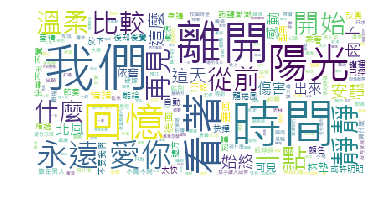

<Figure size 1000x600 with 0 Axes>

In [180]:
# 讀取每首歌的前10個tags
text = open("jay_tags.txt").read()
# 設定停用字(排除常用詞、無法代表特殊意義的字詞)
stopwords = {}.fromkeys(["沒有","怎麼","也許","還是"])
# 產生文字雲
wc = WordCloud(font_path=font_path, #設置字體
               background_color="white", #背景顏色
               max_words = 2000 ,        #文字雲顯示最大詞數
               stopwords=stopwords)      #停用字詞
wc.generate(text)
# 視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

可以看出周杰倫歌詞中常見的重要詞彙有：
我們 離開 陽光 時間 回憶 愛你 永遠 再見等

可以發現周杰倫的熱門歌曲主題應該都是與感情有關的

### 將文字檔讀入，並以結巴斷詞，在將斷好詞的檔案存起來

In [273]:
wf = codecs.open("lyrics_cut_jay.dataset", "w","utf-8")
with open("jay.txt", "r") as f:
    for line in f:
        words = jieba.cut(line)
        wf.write(" ".join(words))
    
        #print(" ".join(words))
wf.close()

In [183]:
with open("lyrics_cut_jay.dataset") as fn:
    for line in fn:
        print(line)

冷 咖啡 離開 了 杯墊   我 忍住 的 情緒 在 很 後面   拚命 想 挽回 的 從前   在 我 臉 上 依舊 清晰 可見   最美 的 不 是 下雨天   是 台 下 的 你們 的 尖叫聲   回憶 的 畫面   在 蕩 著 鞦韆   夢 開始 不 甜   你 說 把 愛 漸漸 放下 會 走 更 遠   又 何必 去 改變   已 錯過 的 時間   你 用 你 的 指尖 阻止 我 說 再見   想像 你 在 身邊   在 完全 失去 之前   你 說 把 愛 漸漸 放下 會 走 更 遠   或許 命運 的簽   只 讓 我們 遇見   只 讓 我們 相戀 這一季 的 秋天   飄落 後 才 發現   這 幸福 的 碎片   要 我 怎麼 撿   冷 咖啡 離開 了 杯墊   我 忍住 的 情緒 在 很 後面   拚命 想 挽回 的 從前   在 我 臉 上 依舊 清晰 可見   最美 的 不 是 下雨天   是 曾 與 你 躲過 雨 的 屋簷   回憶 的 畫面   在 蕩 著 鞦韆 

夢 開始 不 甜   你 說 把 愛 漸漸 放下 會 走 更 遠   又 何必 去 改變   已 錯過 的 時間   你 用 你 的 指尖 阻止 我 說 再見   想像 你 在 身邊   在 完全 失去 之前   你 說 把 愛 漸漸 放下 會 走 更 遠   或許 命運 的簽   只 讓 我們 遇見   只 讓 我們 相戀 這一季 的 秋天   飄落 後 才 發現   這 幸福 的 碎片   要 我 怎麼 撿 



糖果 罐裡 好 多 顏色   微笑 卻 不 甜 了   你 的 某些 快樂   在 沒有 我 的 時刻   中古 世紀 的 城市 裡   我 想 就 走到 這   海鷗 不再 眷戀 大海   可以 飛 更 遠   遠方 傳來 風笛   我 只 在意 有 你 的 消息   城堡 為 愛守著 秘密   而 我 為 你 守 著 回憶 明明 就   不 習慣   牽手   為何 卻 主動 把 手勾   你 的 心事 太多   我 不會 戳破   明明 就   他 比較   溫柔   也許 他 能給 你 更多   不用 抉擇   我 會 自動 變 朋友   糖果 罐裡 好 多 顏色   微笑 卻 不 甜 了   你 的 某些 快樂   在 沒有 我 的 時刻   

#### 建立stopword停用字，停用字內容為上網複製貼到文字檔

In [184]:
with open("stopwords.txt") as f:
    stop_word_content = f.readlines()
stop_word_content = [x.strip() for x in stop_word_content] 
stop_word_content = " ".join(stop_word_content)

#### 建立本次文檔的語料庫(字典)，並將文字檔裡的詞彙給予編號

In [185]:
dictionary = corpora.Dictionary(document.split() for document in open("lyrics_cut_jay.dataset"))
stoplist = set(stop_word_content.split())
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist
            if stopword in dictionary.token2id] 
dictionary.filter_tokens(stop_ids) 
dictionary.compactify() 
dictionary.save("lyrics_jay.dict")

2019-05-08 10:31:28,956 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-05-08 10:31:28,963 : INFO : built Dictionary(1952 unique tokens: ['上', '下', '下雨天', '不', '之前']...) from 82 documents (total 8913 corpus positions)
2019-05-08 10:31:28,966 : INFO : saving Dictionary object under lyrics_jay.dict, separately None
2019-05-08 10:31:28,967 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 10:31:28,969 : INFO : saved lyrics_jay.dict


In [186]:
# 查看：序列化的結果
for word,index in dictionary.token2id.items(): 
    print(word +" id:"+ str(index))

下雨天 id:0
之前 id:1
依舊 id:2
再見 id:3
冷 id:4
台 id:5
命運 id:6
咖啡 id:7
回憶 id:8
夢 id:9
失去 id:10
完全 id:11
尖叫聲 id:12
屋簷 id:13
幸福 id:14
後面 id:15
從前 id:16
忍住 id:17
情緒 id:18
想 id:19
想像 id:20
愛 id:21
拚命 id:22
指尖 id:23
挽回 id:24
撿 id:25
改變 id:26
放下 id:27
時間 id:28
最美 id:29
杯墊 id:30
清晰 id:31
漸漸 id:32
甜 id:33
畫面 id:34
發現 id:35
的簽 id:36
相戀 id:37
碎片 id:38
秋天 id:39
臉 id:40
蕩 id:41
說 id:42
走 id:43
身邊 id:44
躲過 id:45
這一季 id:46
遇見 id:47
遠 id:48
錯過 id:49
阻止 id:50
離開 id:51
雨 id:52
鞦韆 id:53
飄落 id:54
不用 id:55
世紀 id:56
中古 id:57
主動 id:58
也許 id:59
傳來 id:60
在意 id:61
城堡 id:62
城市 id:63
大海 id:64
太多 id:65
守 id:66
微笑 id:67
心事 id:68
快樂 id:69
愛守著 id:70
戳破 id:71
手勾 id:72
抉擇 id:73
明明 id:74
時刻 id:75
更多 id:76
朋友 id:77
比較 id:78
海鷗 id:79
消息 id:80
溫柔 id:81
牽手 id:82
眷戀 id:83
秘密 id:84
糖果 id:85
罐裡 id:86
習慣 id:87
能給 id:88
自動 id:89
裡 id:90
變 id:91
走到 id:92
遠方 id:93
顏色 id:94
風笛 id:95
飛 id:96
一個 id:97
世界 id:98
以後 id:99
危險 id:100
又過 id:101
吹完 id:102
太快 id:103
失控 id:104
好好 id:105
已經 id:106
後知後覺 id:107
悄悄 id:108
愛像 id:109
愛情 id:110
我該 id:111
承

摧毀 id:1343
敷衍 id:1344
會不會 id:1345
會怕 id:1346
灰灰 id:1347
無人 id:1348
無所謂 id:1349
疲憊 id:1350
相 id:1351
睡 id:1352
累不累 id:1353
絕望 id:1354
肯 id:1355
試探 id:1356
追難 id:1357
違背 id:1358
遠走高飛 id:1359
頹廢 id:1360
麻痺 id:1361
黑 id:1362
點點頭 id:1363
一旁 id:1364
哭過 id:1365
寂寞 id:1366
對白 id:1367
忘記 id:1368
我拉著線 id:1369
承諾 id:1370
掩埋 id:1371
擱淺 id:1372
救援 id:1373
曝曬 id:1374
未 id:1375
歉疚 id:1376
留著 id:1377
眼看著 id:1378
睜開 id:1379
複習 id:1380
讀完 id:1381
讀著 id:1382
陰天 id:1383
雙 id:1384
雙眼 id:1385
風箏 id:1386
一盞 id:1387
一端 id:1388
下手 id:1389
下沉 id:1390
不斷 id:1391
不知 id:1392
之分 id:1393
凌晨 id:1394
分寸 id:1395
分散 id:1396
吭聲 id:1397
哪去 id:1398
夜晚 id:1399
存活 id:1400
孤單 id:1401
帶有 id:1402
平衡 id:1403
思緒 id:1404
懂得 id:1405
懷裡 id:1406
挽留 id:1407
播放 id:1408
支撐 id:1409
旁悶 id:1410
沉默 id:1411
灰濛濛 id:1412
燈 id:1413
盤旋 id:1414
盪盪 id:1415
盲目 id:1416
真實 id:1417
睡意 id:1418
稚氣 id:1419
空中 id:1420
空空 id:1421
空間 id:1422
羞怯 id:1423
試著 id:1424
該往 id:1425
躍過 id:1426
身影 id:1427
身旁 id:1428
躲到 id:1429
輕重 id:1430
追尋 id:1431
還來 id:1432
阻擋 id:1

In [188]:
print(dictionary)

Dictionary(1744 unique tokens: ['下雨天', '之前', '依舊', '再見', '冷']...)


#### 將斷詞文字檔移除停用字

In [187]:
texts = [[word for word in document.split() if word not in stoplist]
         for document in open("lyrics_cut_jay.dataset")]

#### 建立corpus，並序列化

In [190]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [192]:
dictionary = corpora.Dictionary.load("lyrics_jay.dict")
corpus1 = corpora.MmCorpus("lyrics_jay.mm")

2019-05-08 10:31:30,164 : INFO : loading Dictionary object from lyrics_jay.dict
2019-05-08 10:31:30,166 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 10:31:30,168 : INFO : loaded lyrics_jay.dict
2019-05-08 10:31:30,169 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 10:31:30,170 : INFO : loaded corpus index from lyrics_jay.mm.index
2019-05-08 10:31:30,172 : INFO : initializing cython corpus reader from lyrics_jay.mm
2019-05-08 10:31:30,172 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 10:31:30,174 : INFO : accepted corpus with 82 documents, 1744 features, 2581 non-zero entries


#### 套用 tfidf model

In [193]:
# 創建 tfidf model
tfidf = models.TfidfModel(corpus1)
corpus_tfidf = tfidf[corpus1]

2019-05-08 10:31:30,551 : INFO : collecting document frequencies
2019-05-08 10:31:30,552 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 10:31:30,554 : INFO : PROGRESS: processing document #0
2019-05-08 10:31:30,558 : INFO : calculating IDF weights for 82 documents and 1743 features (2581 matrix non-zeros)


#### 套用 LDA model

In [333]:
# 創建 LDA model
lda = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=20)
corpus_lda = lda[corpus_tfidf] # LDA潛在語義索引
lda.save('lyrics_jay.lda')
corpora.MmCorpus.serialize('lda_corpus_jay.mm', corpus_lda)
print("LDA topics:")
lda.print_topics(10)

2019-05-08 13:49:56,089 : INFO : using symmetric alpha at 0.05
2019-05-08 13:49:56,092 : INFO : using symmetric eta at 0.05
2019-05-08 13:49:56,094 : INFO : using serial LDA version on this node
2019-05-08 13:49:56,100 : INFO : running online (single-pass) LDA training, 20 topics, 1 passes over the supplied corpus of 82 documents, updating model once every 82 documents, evaluating perplexity every 82 documents, iterating 50x with a convergence threshold of 0.001000
2019-05-08 13:49:56,101 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-05-08 13:49:56,101 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 13:49:56,151 : INFO : -224.604 per-word bound, 40983862472987863685901479563886662591577556611267024050132137017344.0 perplexity estimate based on a held-out corpus of 82 documents with 265 words
2019-05-08 13:49:56,152 : INFO : PROGRESS: pass 0, at document #82/82
201

LDA topics:


[(12,
  '0.004*"楓葉" + 0.003*"緩緩" + 0.002*"思念" + 0.002*"飄落" + 0.002*"北風" + 0.002*"愛" + 0.002*"兩行" + 0.002*"心能" + 0.002*"地面" + 0.002*"傷透"'),
 (8,
  '0.005*"一步" + 0.005*"妳" + 0.004*"說" + 0.003*"乘著" + 0.003*"受夠" + 0.003*"陽光" + 0.003*"汗" + 0.003*"爬" + 0.003*"往上" + 0.003*"話"'),
 (17,
  '0.004*"住" + 0.003*"裡" + 0.002*"手" + 0.002*"固執" + 0.002*"雪融" + 0.002*"壞" + 0.002*"狀態" + 0.002*"留下來" + 0.002*"緊握" + 0.002*"誓言"'),
 (6,
  '0.005*"喔" + 0.004*"妳" + 0.004*"時差" + 0.003*"解藥" + 0.002*"越" + 0.002*"能不能" + 0.002*"成真" + 0.002*"毒藥" + 0.002*"睡得" + 0.002*"理由"'),
 (10,
  '0.006*"女人" + 0.006*"可愛" + 0.004*"親愛的" + 0.003*"妳" + 0.003*"夜" + 0.003*"亂" + 0.003*"面紅" + 0.003*"瘋狂" + 0.002*"花" + 0.002*"擁有"'),
 (4,
  '0.001*"緣若" + 0.001*"落下來" + 0.001*"糾纏" + 0.001*"結晶" + 0.001*"緊握" + 0.001*"看得出來" + 0.001*"花開" + 0.001*"許下" + 0.001*"裡不" + 0.001*"狀態"'),
 (2,
  '0.004*"說" + 0.004*"放下" + 0.004*"幸福" + 0.004*"妳" + 0.004*"遠" + 0.003*"漸漸" + 0.003*"細數" + 0.003*"走" + 0.003*"累" + 0.002*"一路"'),
 (16,
  '0.005*"明明" + 0.004*"一起" + 0.003

### 練習使用word2vec模型，將文字轉換成高維度向量，再使用PCA降維，以嘗試進行資料視覺化

In [195]:
corpus2=texts
# modeling
word2_model = models.Word2Vec(corpus2)

2019-05-08 10:31:31,299 : INFO : collecting all words and their counts
2019-05-08 10:31:31,300 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-08 10:31:31,303 : INFO : collected 1744 word types from a corpus of 5136 raw words and 82 sentences
2019-05-08 10:31:31,305 : INFO : Loading a fresh vocabulary
2019-05-08 10:31:31,307 : INFO : effective_min_count=5 retains 235 unique words (13% of original 1744, drops 1509)
2019-05-08 10:31:31,308 : INFO : effective_min_count=5 leaves 2397 word corpus (46% of original 5136, drops 2739)
2019-05-08 10:31:31,310 : INFO : deleting the raw counts dictionary of 1744 items
2019-05-08 10:31:31,311 : INFO : sample=0.001 downsamples 125 most-common words
2019-05-08 10:31:31,311 : INFO : downsampling leaves estimated 1570 word corpus (65.5% of prior 2397)
2019-05-08 10:31:31,313 : INFO : estimated required memory for 235 words and 100 dimensions: 305500 bytes
2019-05-08 10:31:31,314 : INFO : resetting layer weights
2019-0

In [196]:
word2_model.wv.vocab.keys()
voc=[i for i in word2_model.wv.vocab.keys()]
voc

['咖啡',
 '離開',
 '情緒',
 '想',
 '挽回',
 '從前',
 '臉',
 '依舊',
 '清晰',
 '回憶',
 '畫面',
 '夢',
 '說',
 '愛',
 '漸漸',
 '走',
 '遠',
 '錯過',
 '時間',
 '再見',
 '身邊',
 '失去',
 '命運',
 '遇見',
 '秋天',
 '飄落',
 '發現',
 '幸福',
 '雨',
 '微笑',
 '快樂',
 '時刻',
 '裡',
 '飛',
 '遠方',
 '明明',
 '習慣',
 '牽手',
 '心事',
 '太多',
 '比較',
 '溫柔',
 '也許',
 '更多',
 '不用',
 '節奏',
 '靜靜',
 '默默',
 '世界',
 '愛情',
 '太快',
 '龍捲風',
 '承受',
 '已經',
 '後知後覺',
 '一個',
 '生活',
 '哭',
 '乘著',
 '陽光',
 '吸引',
 '一點',
 '汗',
 '看著',
 '肩膀',
 '喔',
 '心疼',
 '深',
 '擁抱',
 '甜蜜',
 '清楚',
 '手',
 '躺',
 '胸口',
 '現在',
 '難過',
 '反正',
 '在一起',
 '時',
 '開心',
 '溫暖',
 '算',
 '男人',
 '算什麼',
 '期待',
 '繼續',
 '太',
 '想要',
 '風景',
 '美',
 '風',
 '月光',
 '輕輕',
 '地方',
 '輕刷',
 '和弦',
 '卡片',
 '手寫',
 '永遠',
 '記得',
 '廣場',
 '一起',
 '旁',
 '記憶',
 '那年',
 '埋',
 '心',
 '蜻蜓',
 '安靜',
 '等待',
 '屬於',
 '擁有',
 '笑容',
 '思念',
 '痛',
 '看看',
 '愛上',
 '透明',
 '下雨',
 '過去',
 '愛在',
 '死去',
 '話',
 '越',
 '愛你',
 '找',
 '回到',
 '聲音',
 '久',
 '喜歡',
 '耍',
 '原諒',
 '聽',
 '愛過',
 '想念',
 '請',
 '紅塵',
 '故事',
 '妳',
 '笑',
 '緣份',
 '淚',
 '唯一',
 '知道',
 '放棄',
 '終於',
 '追',
 '

In [206]:
word2_model.wv['牽手']

array([ 1.5058434e-04,  5.1223733e-03, -2.8052286e-03,  3.3723258e-03,
        3.4522717e-03, -1.2527915e-03,  6.8936388e-05,  9.0887054e-04,
        2.0791870e-03, -5.4643472e-04,  2.6918675e-03,  6.2850682e-04,
       -2.0737739e-03, -1.0148712e-03, -2.5237235e-03, -2.0152675e-03,
       -5.3529086e-04,  3.5500431e-03, -2.5571024e-03,  1.7925081e-03,
       -3.6233142e-03,  2.9363947e-03,  7.1837637e-04,  5.6537567e-03,
       -1.8147130e-03,  3.9402009e-03,  4.9424102e-03, -1.0556135e-03,
       -1.4162471e-03, -6.2405616e-03,  2.2009993e-03,  3.2375706e-04,
       -3.1177330e-04, -1.9730569e-03, -2.3026036e-03, -4.5392783e-03,
       -4.1524880e-03,  8.0978004e-03,  2.3091550e-03, -2.6300396e-03,
       -4.0583109e-04, -4.0527382e-03, -9.1243051e-03, -3.5366351e-03,
        7.7416040e-03, -1.8735736e-03,  4.1750120e-03, -1.0420338e-03,
       -1.1713122e-03,  7.9846109e-04, -6.1956453e-03, -1.1951480e-03,
        6.9902715e-05, -3.7072119e-03, -3.4266058e-03,  3.5705660e-03,
      

In [198]:
numpy.linalg.norm(word2_model.wv['牽手'] - word2_model.wv['擁抱'])

0.042698536

In [199]:
word2_model.similarity('牽手', '擁抱')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.38080823

列出與“牽手”的相關度，並以資料框表示，關聯度由高排至低

In [200]:
voc_sim={}
for i in voc:
    voc_sim[i]=word2_model.similarity('牽手', i)
voc_simseries=pd.Series(voc_sim)
voc_simdf=pd.DataFrame({"similarity":voc_simseries})
voc_simdf=voc_simdf.sort_values("similarity",ascending=False)
voc_simdf

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


,similarity
牽手,1.000000
愛,0.700007
妳,0.674228
可愛,0.659364
說,0.656900
從前,0.651635
手,0.643190
想,0.641190
受夠,0.635817
回憶,0.629840


In [201]:
word2_model.most_similar(['牽手'])


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-05-08 10:31:32,470 : INFO : precomputing L2-norms of word weight vectors


[('愛', 0.700007438659668),
 ('妳', 0.674228310585022),
 ('可愛', 0.6593643426895142),
 ('說', 0.6568995714187622),
 ('從前', 0.6516354084014893),
 ('手', 0.6431902647018433),
 ('想', 0.6411895751953125),
 ('受夠', 0.6358174085617065),
 ('回憶', 0.6298402547836304),
 ('一步', 0.6212083101272583)]

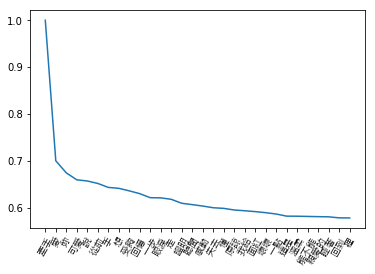

In [202]:
plt.plot(voc_simdf[:30])
plt.xticks(fontproperties = prop, rotation = 60)
plt.show()

In [208]:
from sklearn.decomposition import PCA

In [253]:
x_data=[]
x_data.append(word2_model.wv['牽手'])
x_data.append(word2_model.wv['愛'])
x_data.append(word2_model.wv['可愛'])
x_data.append(word2_model.wv['說'])
x_data.append(word2_model.wv['從前'])
x_data.append(word2_model.wv['手'])
x_data.append(word2_model.wv['想'])

x_data.append(word2_model.wv['下雨'])
x_data.append(word2_model.wv['更多'])
x_data.append(word2_model.wv['終於'])
x_data.append(word2_model.wv['溢出'])
x_data.append(word2_model.wv["明白"])

#### 用PCA降維至二維，並畫出散佈圖，查看各點的距離

In [266]:
pca = PCA(n_components=2) # n_components 為要降到的維度，這邊降為二維
pca.fit(x_data) # 使用 x_data 為來源資料
result = pca.transform(x_data) # 使用 transform() 即可取得降維後的陣列
print(result)
resultdf=pd.DataFrame(result)
resultdf[2]=[2,1,1,1,1,1,1,0,0,0,0,0]
resultdf

[[-0.01236155 -0.00750493]
 [ 0.0248448   0.0051525 ]
 [ 0.03193968 -0.00898135]
 [ 0.04003209 -0.01052418]
 [ 0.00273654 -0.00981576]
 [ 0.00062645  0.00106205]
 [ 0.03783603  0.02062383]
 [-0.02015537  0.01081474]
 [-0.02627309  0.00794901]
 [-0.02328985 -0.0183049 ]
 [-0.02745705  0.00501912]
 [-0.02847869  0.00450987]]


,0,1,2
0,-0.012362,-0.007505,2
1,0.024845,0.005152,1
2,0.031940,-0.008981,1
3,0.040032,-0.010524,1
4,0.002737,-0.009816,1
5,0.000626,0.001062,1
6,0.037836,0.020624,1
7,-0.020155,0.010815,0
8,-0.026273,0.007949,0
9,-0.023290,-0.018305,0


種類2為牽手這個字彙本身
種類1為與牽手這個字彙高相關
種類0為與牽手這個字彙低相關

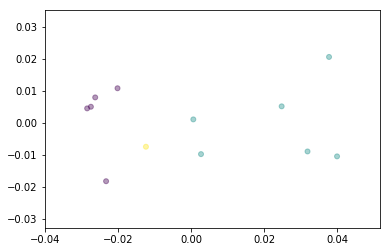

In [313]:
# 使用 matplotlib 將結果繪出
plt.scatter(resultdf[0],resultdf[1],c=resultdf[2],s=25, alpha=0.4, marker='o')
plt.show()

黃色為牽手
藍色為相關度較高的詞彙
紫色為相關較低的詞彙
畫圖發現 視覺化結果的距離好像不太能代表相關程度的高低
可能是我還不夠熟悉套件的使用

### 練習用sklearn 方式去看詞彙的重要程度（df-idf)

In [288]:
result =[]
lst=[]
for i in texts:
    for j in i:
        lst.append(j)
content = ' '.join(lst) 
result.append(content)


In [289]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [290]:
vectorizer = CountVectorizer()    
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(vectorizer.fit_transform(result))
word = vectorizer.get_feature_names() 
weight = tfidf.toarray()

In [331]:
#製作tfidf 矩陣
df_tfidf = pd.DataFrame(tfidf.toarray(),columns=word)
df_tfidf

,dvd,ho,一一,一個,一個給,一半,一口,一句,一回,一圈,...,黃黃,黑云,黑暗,黑框,黑色,默認,默默,點燃,點點頭,龍捲風
0,0.013485,0.006743,0.013485,0.087654,0.013485,0.006743,0.006743,0.006743,0.006743,0.013485,...,0.006743,0.006743,0.006743,0.006743,0.006743,0.006743,0.033713,0.013485,0.006743,0.040456


In [332]:
df_tfidf=df_tfidf.sort_values(by=[0],axis=1,ascending=False)
df_tfidf.iloc[:,:10]

,離開,女人,可愛,回憶,愛情,時間,永遠,感動,溫柔,男人
0,0.235991,0.202278,0.202278,0.161823,0.15508,0.15508,0.12811,0.114624,0.107882,0.101139


從這個資料框可以發現 在周杰倫歌詞中 重要的常見詞彙有：
離開 女人 可愛 回憶 愛情 時間 永遠 感動 溫柔 男人

In [ ]:
可以發現周杰倫的熱門歌曲主題應該都是與感情有關的